In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 10.0 kB/s 
     |████████████████████████████████| 4.3 MB 42.7 MB/s 
     |████████████████████████████████| 462 kB 60.3 MB/s 
     |████████████████████████████████| 1.3 MB 57.6 MB/s 
     |████████████████████████████████| 5.6 MB 43.0 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30693 sha256=2c35df2dcc4b345c8d76811f5d3b3a326334811424ada7da1eb6fed8eb61e713
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[9]

'truck'

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

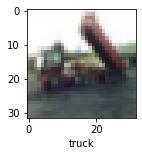

In [11]:
plot_sample(X_train, y_train, 2)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.8144 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.6233 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.5415 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4840 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4364 - accuracy: 0.4952


In [14]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4775 - accuracy: 0.4694
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1580 - accuracy: 0.5933
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0281 - accuracy: 0.6408
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9616 - accuracy: 0.6654
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9059 - accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8603 - accuracy: 0.7003
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8259 - accuracy: 0.7130
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7872 - accuracy: 0.7257
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7552 - accuracy: 0.7366
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [15]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9376 - accuracy: 0.6854


[0.9375801682472229, 0.6854000091552734]

In [16]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

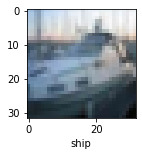

In [17]:
plot_sample(X_test, y_test, 2)

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.56597917e-02, 3.23434069e-04, 3.80792208e-02, 4.00950938e-01,
        3.09509039e-02, 3.28662097e-01, 3.57122459e-02, 1.05373585e-03,
        1.18235700e-01, 3.71881935e-04],
       [6.40120532e-04, 1.02086561e-02, 2.33094738e-06, 3.03347178e-07,
        1.36411540e-08, 2.59132249e-09, 1.15059056e-08, 3.19731047e-10,
        9.88981009e-01, 1.67489168e-04],
       [2.45369095e-02, 7.97730759e-02, 3.73107730e-03, 4.26197285e-03,
        3.78939410e-04, 1.07348453e-04, 1.16285955e-04, 1.93475862e-05,
        8.72660220e-01, 1.44148180e-02],
       [8.65082741e-01, 3.73494462e-03, 1.37566142e-02, 2.90336087e-04,
        8.37458007e-04, 4.53831235e-05, 2.06452838e-04, 1.00823736e-05,
        1.15911655e-01, 1.24292797e-04],
       [5.11070039e-06, 1.71515148e-06, 1.54451851e-03, 4.43377830e-02,
        2.92337567e-01, 1.56688679e-03, 6.60063505e-01, 2.42453989e-05,
        1.14534319e-04, 4.13756379e-06]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

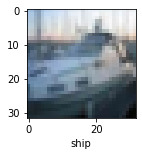

In [21]:
plot_sample(X_test, y_test, 2)

In [22]:
classes[y_classes[2]]

'ship'

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

In [24]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.81      0.80      0.81      1000
           2       0.58      0.55      0.56      1000
           3       0.56      0.42      0.48      1000
           4       0.59      0.69      0.63      1000
           5       0.66      0.49      0.57      1000
           6       0.59      0.88      0.71      1000
           7       0.80      0.71      0.75      1000
           8       0.77      0.82      0.79      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

